In [61]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [62]:
boston = load_boston()
X, y = boston.data, boston.target
X.shape, y.shape

D:\Program_Files\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

((506, 13), (506,))

In [63]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [64]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [65]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [67]:
#LinearRegression
#pd.get_dummies(df['CHAS'])
chas_df = pd.get_dummies(df['CHAS'])
chas_df.columns = ['CHAS_0', 'CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [68]:
df2 = df.join(chas_df)
df2.drop(columns='CHAS', inplace=True)
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [69]:
#######
pd.get_dummies(df, columns=['CHAS'])

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0.0,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1,0


In [70]:
########
y = df2['MEDV']
######
X = df2.drop(columns='MEDV')
X.shape, y.shape

((506, 14), (506,))

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((379, 14), (127, 14))

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sd = StandardScaler()
mm = MinMaxScaler()

sd_X_train_scaled = sd.fit_transform(X_train) 
sd_X_test_scaled = sd.transform(X_test)
#mm_X_train_scaled = mm.fit_transform(X_train)
#mm_X_test_scaled = mm.transform(X_test)

In [73]:
###
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
##
lr.fit(sd_X_train_scaled, y_train)
print(lr.coef_)
print(lr.intercept_)

[-0.97100092  1.04667838 -0.04044753 -1.80876877  2.60991991 -0.19823317
 -3.00216551  2.08021582 -1.93289037 -2.15743759  0.75199122 -3.59027047
 -0.29704388  0.29704388]
22.608707124010557


In [74]:
pd.Series (lr.coef_, index=X_train.columns)

CRIM      -0.971001
ZN         1.046678
INDUS     -0.040448
NOX       -1.808769
RM         2.609920
AGE       -0.198233
DIS       -3.002166
RAD        2.080216
TAX       -1.932890
PTRATIO   -2.157438
B          0.751991
LSTAT     -3.590270
CHAS_0    -0.297044
CHAS_1     0.297044
dtype: float64

In [75]:
y_train[:5]

245    18.5
59     19.6
276    33.2
395    13.1
416     7.5
Name: MEDV, dtype: float64

In [76]:
sd_pred_train = lr.predict(sd_X_train_scaled)
sd_pred_test = lr.predict(sd_X_test_scaled)

In [77]:
"""
lr.fit(mm_X_train_scaled, y_train)
mm_pred_train = lr.predict(mm_X_train_scaled)
mm_pred_test = lr.predict(mm_X_test_scaled)
"""

'\nlr.fit(mm_X_train_scaled, y_train)\nmm_pred_train = lr.predict(mm_X_train_scaled)\nmm_pred_test = lr.predict(mm_X_test_scaled)\n'

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

def print_regression_metrics(y, pred, title=None):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if title:
        print(title)
    print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")
    print("-"*100)

In [79]:
print(print_regression_metrics(y_train, sd_pred_train, title='sd_train'))
print(print_regression_metrics(y_test, sd_pred_test, title='sd_test'))
#print(print_regression_metrics(y_train, mm_pred_train, title='mm_train'))
#print(print_regression_metrics(y_test, mm_pred_test, title='mm_test'))

sd_train
MSE: 19.640519427908046, RMSE: 4.4317625644779355, R2: 0.7697699488741148
----------------------------------------------------------------------------------------------------
None
sd_test
MSE: 29.782245092302414, RMSE: 5.457311159564059, R2: 0.6354638433202122
----------------------------------------------------------------------------------------------------
None


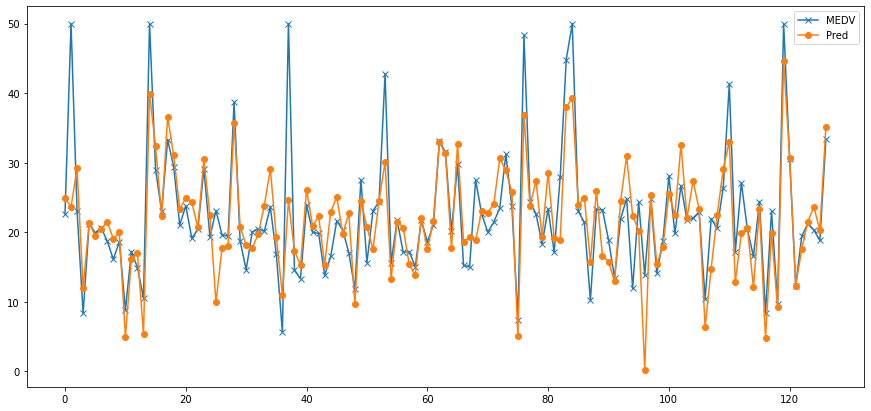

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(range(len(y_test)), y_test, label='MEDV', marker='x')
plt.plot(range(len(y_test)), sd_pred_test, label='Pred', marker='o')
plt.legend()
plt.show()

In [81]:
#다항회귀

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

m = 100 #데이터 개수
X = 6 * np.random.rand(m, 1) - 3 #np.random.rand(0축개수, 1축개수) : 0~1
y = X**2 + X + 2 + np.random.normal(0,1, size=(m,1)) #np.random.normal(평균, 표준편차) 정규분포 랜덤실수
print(X.shape, y.shape)
y = y.flatten() #N차원 배열을 1차원 배열로 변환
print(X.shape, y.shape)

(100, 1) (100, 1)
(100, 1) (100,)


In [83]:
df = pd.DataFrame({"X":X.flatten(), "Y":y})
df.head()

,X,Y
0,0.292881,1.213510
1,1.291136,5.858995
2,0.616580,3.462414
3,0.269299,0.805577
4,-0.458071,3.240010


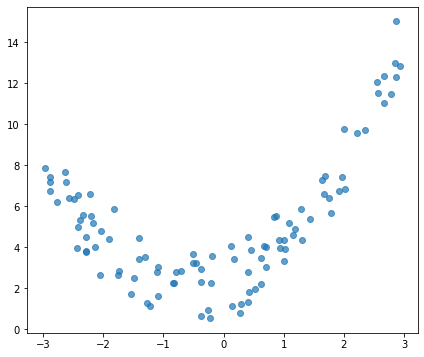

In [84]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.7)
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_, lr.intercept_)

[0.78189543] 5.175619278567209


In [87]:
np.mean(y)

5.047985043575299

In [88]:
pred = lr.predict(X)
print_regression_metrics(y, pred)

MSE: 7.729204760808937, RMSE: 2.7801447373848966, R2: 0.19138252437306003
----------------------------------------------------------------------------------------------------


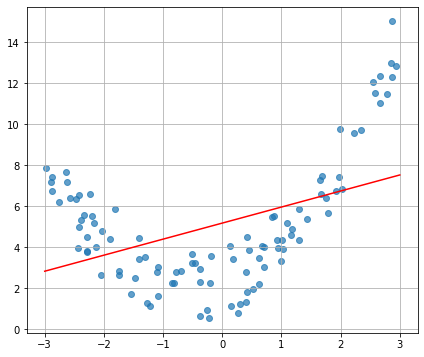

In [89]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
pred_new = lr.predict(X_new)

plt.figure(figsize=(7,6))

plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, pred_new, color='red')

plt.grid(True)
plt.show()

In [90]:
#PolynoimialFeatures
#!!!!!!
from sklearn.preprocessing import PolynomialFeatures

In [91]:
#PolynominalFeatures(degree=?, include_bias=False)
#X_poly.fit_transform(X)
poly_f = PolynomialFeatures(degree=2,
                           include_bias=False)
X_poly = poly_f.fit_transform(X)

In [92]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [93]:
X[:5]

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ]])

In [94]:
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [95]:
poly_f.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [96]:
#linearRegression 모델을 이용해 평가
lr2=LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

In [97]:
print(lr2.coef_, lr2.intercept_)

[0.97906552 0.94978823] 2.3405007562628866


In [98]:
pred2 = lr2.predict(X_poly)
print_regression_metrics(y, pred2, title='다항회귀')
print_regression_metrics(y, pred, title='변환없이')

다항회귀
MSE: 0.9735576723414217, RMSE: 0.9866902616026073, R2: 0.8981478985551461
----------------------------------------------------------------------------------------------------
변환없이
MSE: 7.729204760808937, RMSE: 2.7801447373848966, R2: 0.19138252437306003
----------------------------------------------------------------------------------------------------


In [99]:
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_f.transform(X_new)
pred_new2 = lr2.predict(X_new_poly)

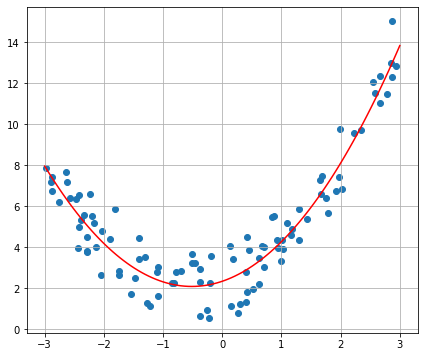

In [100]:
plt.figure(figsize=(7,6))

plt.scatter(X, y)
plt.plot(X_new, pred_new2, color='red')
plt.grid(True)
plt.show()

In [101]:
pnf = PolynomialFeatures(degree=25, include_bias=True)

X_train_poly_100 = pnf.fit_transform(X)
X_train_poly_100.shape, X.shape

((100, 26), (100, 1))

In [102]:
lr = LinearRegression()
lr.fit(X_train_poly_100, y)

LinearRegression()

In [103]:
lr.coef_.shape

(26,)

In [104]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
#######!!!!
X_new_poly_100 = pnf.transform(X_new)
pred_new_100 = lr.predict(X_new_poly_100)

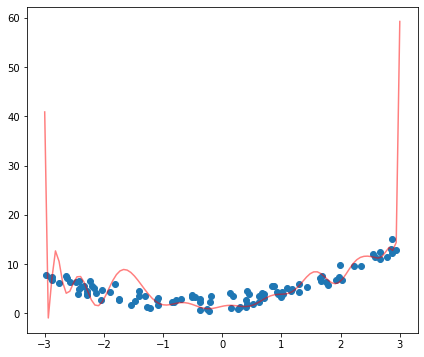

In [105]:
plt.figure(figsize=(7,6))
plt.scatter(X, y)
plt.plot(X_new, pred_new_100, color='r', alpha=0.5)
plt.show()
#중간은 과대적합이며 맨처음과 맨 마지막을 봤을때 전혀 값을 예측하지 못함
#차수를 늘린다고 해서 무조건 좋은것은 아님

In [106]:
data = np.arange(12).reshape(4,3) #Feature: 3
print(data.shape)
data

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [107]:
pnf2 = PolynomialFeatures(degree=2)
data_poly = pnf2.fit_transform(data)
data_poly.shape

(4, 10)

In [108]:
###
pnf2.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [109]:
pd.DataFrame(data_poly, columns=pnf2.get_feature_names_out())

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,6.0,7.0,8.0,36.0,42.0,48.0,49.0,56.0,64.0
3,1.0,9.0,10.0,11.0,81.0,90.0,99.0,100.0,110.0,121.0


In [110]:
pnf3 = PolynomialFeatures(degree=5)
data_poly2 = pnf3.fit_transform(data)
data_poly2.shape

(4, 56)

In [113]:
pnf3.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [114]:
pnf4 = PolynomialFeatures(interaction_only=True)
data_poly4 = pnf4.fit_transform(data)
data_poly4.shape

(4, 7)

In [115]:
pnf4.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0 x1', 'x0 x2', 'x1 x2'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
###scaler를 train_set을 기준으로 학습 후 train/val/test set 변환
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [116]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = pnf.fit_transform(X_train_scaled)
X_test_scaled_poly = pnf.transform(X_test_scaled)

NameError: name 'X_train_scaled' is not defined